In [23]:
import pandas as pd

dataframe = pd.read_csv("Online Retail.csv", encoding = "ISO-8859-1")
dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [54]:
import datetime as dt
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

dataframe["InvoiceDate"] = pd.to_datetime(dataframe["InvoiceDate"])
dataframe["InvoiceMonth"] = dataframe["InvoiceDate"].apply(get_month)

In [65]:
grouping = dataframe.groupby('CustomerID')["InvoiceMonth"]
dataframe["CohortMonth"] = grouping.transform('min')
dataframe.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01,2.55,14688.0,United Kingdom,2010-12-01,2010-12-01
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01,0.42,14688.0,United Kingdom,2010-12-01,2010-12-01
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01,0.55,14688.0,United Kingdom,2010-12-01,2010-12-01
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01,0.55,14688.0,United Kingdom,2010-12-01,2010-12-01


In [96]:
def get_date_int(df, column):
    return df[column].dt.year, df[column].dt.month, df[column].dt.day

invoice_year, invoice_month, _ = get_date_int(dataframe, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(dataframe, 'CohortMonth')

years_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

dataframe['cohort_index'] = years_diff * 12 + month_diff + 1

In [122]:

grouping = dataframe.groupby(['CohortMonth', 'cohort_index'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# Create a pivot 
cohort_data = cohort_data.reset_index()
cohort_data = cohort_data.pivot(index="CohortMonth",columns="cohort_index",values="CustomerID")

cohort_data.head(15)

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Select the first column and store it to cohort_sizes
cohort_size = cohort_data.iloc[:, 0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_data.divide(cohort_size, axis=0)
retention = retention.round(3) * 100
retention.head(20)

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
cohort_data = cohort_data.pivot(index="CohortMonth",columns="cohort_index",values="Quantity")
cohort_data.head(15)

cohort_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.037691,14.603253,14.982141,14.801090,12.943024,14.318095,15.173387,14.759559,16.660455,16.691004,17.264954,12.823263,14.776623
2011-01-01,10.015502,12.573579,12.343099,10.940531,12.234048,14.895373,14.226042,14.385729,11.398390,9.883069,9.090436,9.541612,NaN
2011-02-01,10.830223,12.081317,18.563242,11.959050,11.117223,11.411479,13.346939,12.381845,10.272146,11.945771,12.645977,NaN,NaN
2011-03-01,9.762443,9.924222,12.207366,9.455425,13.579228,12.313412,13.162317,12.177130,10.517494,8.880203,NaN,NaN,NaN
2011-04-01,9.753962,10.105226,9.420617,11.598922,11.488889,8.220785,9.680620,9.289391,7.290019,NaN,NaN,NaN,NaN
2011-05-01,10.866930,9.030276,13.884270,11.805435,10.900268,8.668230,10.148510,7.371571,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.327849,13.681576,10.463847,13.275611,10.232734,9.758786,9.255627,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.722333,12.700952,7.142646,7.844268,6.013594,7.013233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.890294,5.958955,5.345404,5.976259,6.980110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Retention Rates'}, xlabel='cohort_index', ylabel='CohortMonth'>

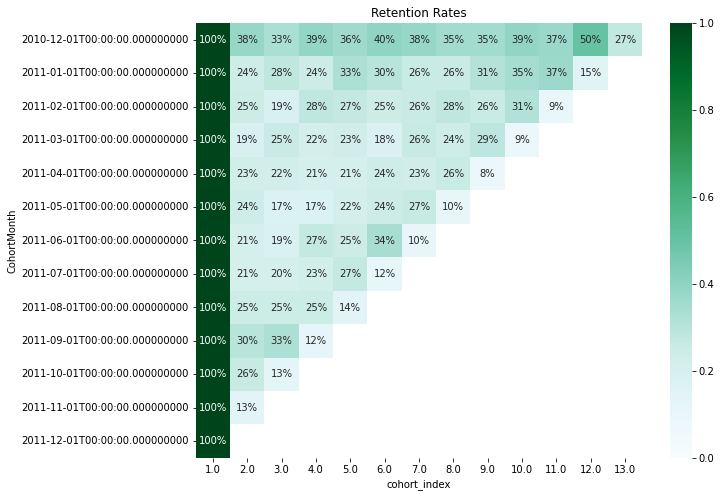

In [134]:
# Visualiziation

# Select the first column and store it to cohort_sizes
cohort_size = cohort_data.iloc[:, 0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_data.divide(cohort_size, axis=0)
retention.round(3) * 100

# Import seaborn package as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an 10 by 8 inches plot figure
plt.figure(figsize=(10, 8))

# Add a title
plt.title('Retention Rates')

# Create the heatmap
sns.heatmap(
    data = retention,
    annot = True,
    fmt = '.0%',
    vmin=0,
    vmax=1,
    cmap ='BuGn'
)